In [1]:
import pickle

"""
Author: Valentina Matos (Johns Hopkins - Wirtz/Kiemen Lab)
Date: June 22, 2024
"""

import os
import numpy as np
import warnings
from save_model_metadata import save_model_metadata
from load_annotation_data import load_annotation_data
from train_segmentation_model import train_segmentation_model
from create_training_tiles import create_training_tiles
from test_segmentation_model import test_segmentation_model
from classify_images import classify_images
warnings.filterwarnings("ignore")

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


In [6]:
tf.config.list_physical_devices('GPU')

[]

In [3]:
#_______________Variable parametrization_______________

# Location of annotations
pth = r'C:\Users\Valentina\OneDrive - Johns Hopkins\Desktop\python model 2'

# Location of tif/png images corresponding to annotated files
pthim = os.path.join(pth, '5x')

# Location of annotations for model testing
pthtest = os.path.join(pth, 'testing images')

# Location of tif/png images corresponding to testing annotated files
pthtestim = os.path.join(pthtest, '5x')

model_name = '06_26_2024_raw_mattiles'

classNames = ['islet', 'duct', 'blood vessel', 'fat','acini','ecm','whitespace','PanIN', 'nerves','immune', 'PDAC']

umpix = 2 # um/pixel of images used  1=10x, 2=5x, 4=16x

# Define actions to take per annotation class
WS = [[2, 0, 0, 1, 0, 0, 2, 0, 2, 2, 2, 0, 0], [7, 6], 
      [1, 2, 3, 4, 5, 6, 7, 8, 7, 9, 10, 8, 11], 
      [6, 5, 4, 11, 1, 2, 3, 8, 10, 12, 13, 7, 9], []]


colormap = [
    [121, 248, 252],
    [  0,   0, 255],
    [ 80, 237,  80],
    [255, 255,   0],
    [149,  35, 184],
    [255, 194, 245],
    [255, 255, 255],
    [255,   0,   0],
    [ 73, 120, 111],
    [  0,   0,   0],
    [240, 159,  10]
]

numclass = max(WS[2])

tile_size = 1024

# Define path to model based on the model name (don't change this)
pthDL = os.path.join(pth, model_name)

#Number of training tiles
ntrain = 15
#Number of validation tiles
nvalidate = np.ceil(ntrain/5)

nblack = numclass + 1;nwhite = WS[1][0]
colormap = np.array(colormap)
# numims = 2 #not usable for now

Saving model metadata and classification colormap...
Net file already exists, updating data...


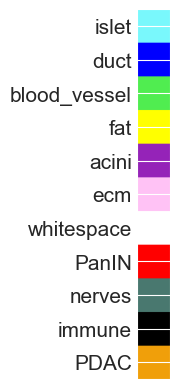

In [6]:
# 1 save model metadata
save_model_metadata(pthDL, pthim, WS, model_name, umpix, colormap, tile_size, classNames, ntrain, nvalidate)

In [7]:
# 2 load and format annotations from each annotated image
[ctlist0, numann0] = load_annotation_data(pthDL, pth, pthim)

 
Importing annotation data...
Image 1 of 2: SG_013_0061
 1. of 4. Importing annotation data from xml file
 Creating file...
  Calculating TA image
 2. of 4. Interpolating annotated regions and saving mask image
 4. of 4. Creating bounding box tiles of all annotations
 Finished image in 106 seconds.
Image 2 of 2: SG_014_0016
 1. of 4. Importing annotation data from xml file
 Creating file...
  Calculating TA image
 2. of 4. Interpolating annotated regions and saving mask image
 4. of 4. Creating bounding box tiles of all annotations
 Finished image in 448 seconds.


In [ ]:
# 3 Make training & validation tiles for model training
create_training_tiles(pthDL, numann0, ctlist0)

No GPU available. Ensure that the NVIDIA GPU and CUDA are correctly installed.
Starting model training...
Epoch 1/8
303/303 ━━━━━━━━━━━━━━━━━━━━ 7585s 25s/step - accuracy: 0.7967 - loss: 0.6396 - val_accuracy: 0.7600 - val_loss: 0.7878
Epoch 2/8
303/303 ━━━━━━━━━━━━━━━━━━━━ 6719s 22s/step - accuracy: 0.9015 - loss: 0.2901 - val_accuracy: 0.8963 - val_loss: 0.3182
Epoch 3/8
303/303 ━━━━━━━━━━━━━━━━━━━━ 6396s 21s/step - accuracy: 0.9218 - loss: 0.2260 - val_accuracy: 0.9125 - val_loss: 0.2615
Epoch 4/8
303/303 ━━━━━━━━━━━━━━━━━━━━ 5196s 17s/step - accuracy: 0.9325 - loss: 0.1929 - val_accuracy: 0.9077 - val_loss: 0.2894
Epoch 5/8
303/303 ━━━━━━━━━━━━━━━━━━━━ 5186s 17s/step - accuracy: 0.9388 - loss: 0.1734 - val_accuracy: 0.9092 - val_loss: 0.2927
Epoch 6/8
303/303 ━━━━━━━━━━━━━━━━━━━━ 5187s 17s/step - accuracy: 0.9437 - loss: 0.1580 - val_accuracy: 0.9045 - val_loss: 0.2970
Epoch 7/8
303/303 ━━━━━━━━━━━━━━━━━━━━ 5186s 17s/step - accuracy: 0.9478 - loss: 0.1458 - val_accuracy: 0.8794 - v

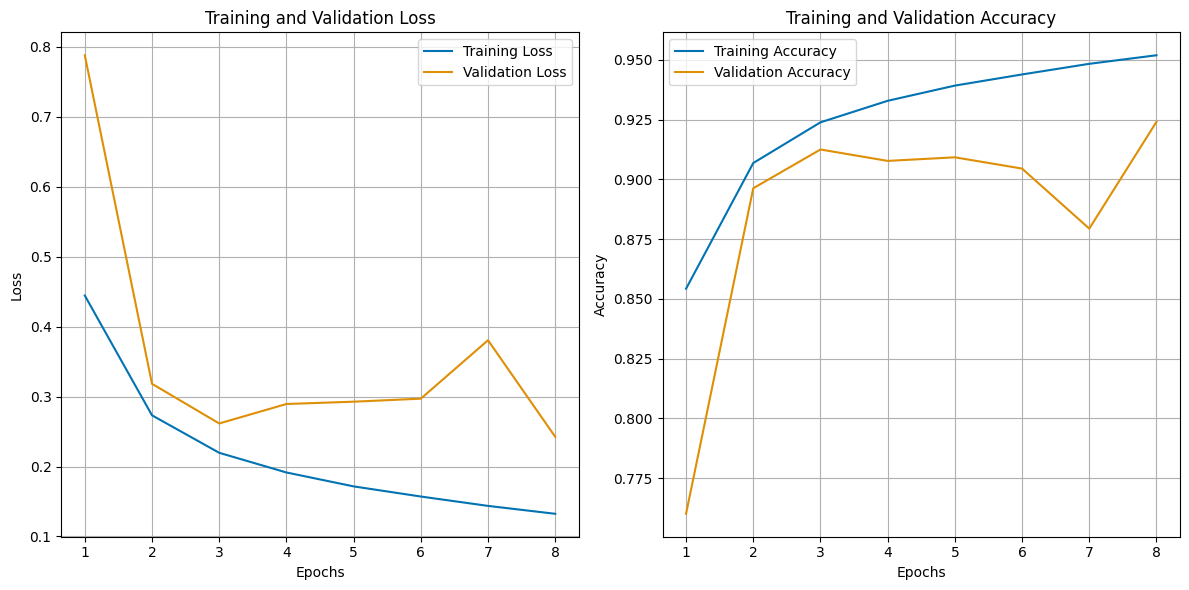

In [8]:
# 4 Train model
train_segmentation_model(pthDL)

In [4]:
# 5 Test model
pthtest = r'C:\Users\Valentina\OneDrive - Johns Hopkins\Desktop\python model 2\testing images'
pthtestim = os.path.join(pthtest, '5x')
test_segmentation_model(pthDL, pthtest, pthtestim)

Testing segmentation model......
 
Importing annotation data...
Image 1 of 2: SG_013_0013
 1. of 4. Importing annotation data from xml file
 Creating file...


FileNotFoundError: No such file: 'C:\Users\Valentina\OneDrive - Johns Hopkins\Desktop\python model 2\testing images\5x\SG_013_0013.jp2'

   
  Starting classification of image 1 of 2: SG_013_0061.png
   Tile: 1 of 247 at (0, 0), size: (1024, 1024, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
   Tile: 2 of 247 at (0, 824), size: (1024, 1024, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
   Tile: 3 of 247 at (0, 1648), size: (1024, 1024, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
   Tile: 4 of 247 at (0, 2472), size: (1024, 1024, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
   Tile: 5 of 247 at (0, 3296), size: (1024, 1024, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
   Tile: 6 of 247 at (0, 4120), size: (1024, 1024, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
   Tile: 7 of 247 at (0, 4944), size: (1024, 1024, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
   Tile: 8 of 247 at (0, 5768), size: (1024, 1024, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
   Tile: 9 of 247 at (0, 6592), size: (1024, 1024, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
   Tile: 10 of 247 at (0, 7416), size: (1024, 1024, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
   Tile: 11 of 247 at (0, 8240), size: (

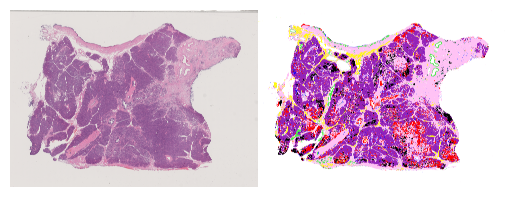

  Starting classification of image 2 of 2: SG_014_0016.png
   Tile: 1 of 300 at (0, 0), size: (1024, 1024, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
   Tile: 2 of 300 at (0, 824), size: (1024, 1024, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
   Tile: 3 of 300 at (0, 1648), size: (1024, 1024, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
   Tile: 4 of 300 at (0, 2472), size: (1024, 1024, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
   Tile: 5 of 300 at (0, 3296), size: (1024, 1024, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
   Tile: 6 of 300 at (0, 4120), size: (1024, 1024, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
   Tile: 7 of 300 at (0, 4944), size: (1024, 1024, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
   Tile: 8 of 300 at (0, 5768), size: (1024, 1024, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
   Tile: 9 of 300 at (0, 6592), size: (1024, 1024, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
   Tile: 10 of 300 at (0, 7416), size: (1024, 1024, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
   Tile: 11 of 300 at (0, 8240), size: (1024

'C:\\Users\\Valentina\\OneDrive - Johns Hopkins\\Desktop\\test png\\PNG\\classification_04_19_2024'

In [3]:
# 6 Classify images with pretrained model
pthim = r'C:\Users\Valentina\OneDrive - Johns Hopkins\Desktop\test png\PNG'
classify_images(pthim,pthDL)